In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load final pricing output generated from pricing logic notebook
df = pd.read_csv(r'C:\Users\HP\Downloads\KarmicSeed_Pricing_Assignment\data\processed\recommended_prices_clean.csv')

# Keep only columns required for final recommendations & insights
required_cols = [
    'sku',
    'current_price',
    'recommended_price',
    'total_unit_cost',
    'target_gross_margin_%',
    'weeks_of_cover_t30',
    'conversion_rate',
    'units_ordered',
    'sell_through',
'lowest_competitor_price',
    'highest_competitor_price'
]

df = df[required_cols].copy()

# Ensure numeric consistency
numeric_cols = [
    'current_price',
    'recommended_price',
    'total_unit_cost',
    'target_gross_margin_%',
    'weeks_of_cover_t30',
    'conversion_rate',
    'units_ordered',
    'sell_through',
    'lowest_competitor_price',
    'highest_competitor_price'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

df.head()


,sku,current_price,recommended_price,total_unit_cost,target_gross_margin_%,weeks_of_cover_t30,conversion_rate,units_ordered,sell_through,lowest_competitor_price,highest_competitor_price
0,MN-01,38.9,32.41,32.30,0.35,6,0.305570,587,1.33,31.95,44.90
1,MN-02,33.9,27.90,26.60,0.35,7,0.233985,431,1.56,27.90,39.95
2,MN-03,34.9,30.03,30.03,0.35,8,0.228172,196,1.16,29.99,42.50
3,MN-04,29.9,25.94,25.94,0.35,8,0.316225,191,1.65,24.50,35.90
4,MN-05,21.9,25.77,25.77,0.45,0,0.177882,341,1.47,18.95,0.00


In [46]:
#  Derived metrics
# Price change ratio: recommended / current (guard against zero current_price)
df['price_ratio'] = np.where(df['current_price'] > 0,
                             df['recommended_price'] / df['current_price'],
                             np.nan)

# Recommended margin % (based on recommended_price)
df['recommended_margin_%'] = np.where(
    df['recommended_price'] > 0,
    (df['recommended_price'] - df['total_unit_cost']) / df['recommended_price'] * 100,
    np.nan
)

# Ensure competitor columns exist for charting
df['lowest_competitor_price'] = pd.to_numeric(df.get('lowest_competitor_price', np.nan), errors='coerce')
df['highest_competitor_price'] = pd.to_numeric(df.get('highest_competitor_price', np.nan), errors='coerce')


In [47]:
#  Executive snapshot table
# Priority = low inventory (weeks_of_cover_t30 small) and high sell_through
snapshot = df.copy()
snapshot['priority_score'] = (
    (snapshot['weeks_of_cover_t30'].rank(method='min', ascending=True)) * 0.6 +
    (snapshot['sell_through'].rank(method='min', ascending=False)) * 0.4
)
snapshot = snapshot.sort_values('priority_score').reset_index(drop=True)

cols = [
    'sku', 'current_price', 'recommended_price', 'recommended_margin_%',
    'total_unit_cost', 'weeks_of_cover_t30', 'units_ordered', 'conversion_rate', 'sell_through',
    'lowest_competitor_price', 'highest_competitor_price'
]
exec_snapshot = snapshot[cols].head(20).copy()
exec_snapshot.reset_index(drop=True, inplace=True)
exec_snapshot


,sku,current_price,recommended_price,recommended_margin_%,total_unit_cost,weeks_of_cover_t30,units_ordered,conversion_rate,sell_through,lowest_competitor_price,highest_competitor_price
0,MN-21,21.90,20.44,5.088063,19.40,0,583,0.143702,3.18,18.99,29.9
1,MN-14,26.90,25.74,3.146853,24.93,2,1399,0.320798,1.93,23.95,35.9
2,MN-25,34.90,32.89,5.107936,31.21,3,4471,0.485240,3.00,29.99,44.9
3,MN-19,36.90,34.71,5.099395,32.94,2,1645,0.174554,1.83,32.95,49.9
4,MN-17,29.90,28.89,3.149879,27.98,2,762,0.231330,1.83,26.99,39.9
5,MN-50,29.90,29.08,5.089409,27.60,3,361,0.200222,1.92,24.95,38.9
6,MN-15,21.90,19.87,3.170609,19.24,4,2379,0.228486,1.91,18.99,29.9
7,MN-22,20.90,20.10,5.074627,19.08,4,722,0.234112,1.85,17.95,27.9
8,MN-49,32.90,30.67,0.358657,30.56,5,380,0.173437,1.89,27.95,41.9
9,MN-12,19.90,18.47,3.248511,17.87,3,352,0.172549,1.69,17.95,27.9


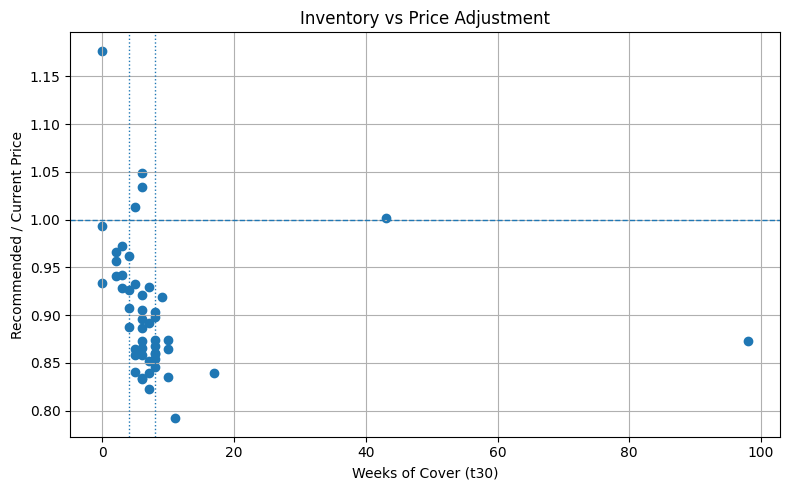

In [48]:
# Inventory vs Price Adjustment

# Chart - Inventory vs Price Adjustment
low_inv = df['weeks_of_cover_t30'].quantile(0.20)
high_inv = df['weeks_of_cover_t30'].quantile(0.80)

plt.figure(figsize=(8,5))
plt.scatter(df['weeks_of_cover_t30'], df['price_ratio'])

# Reference lines
plt.axhline(1.0, linestyle='--', linewidth=1)
plt.axvline(low_inv, linestyle=':', linewidth=1)
plt.axvline(high_inv, linestyle=':', linewidth=1)

plt.xlabel('Weeks of Cover (t30)')
plt.ylabel('Recommended / Current Price')
plt.title('Inventory vs Price Adjustment')

plt.grid(True)
plt.tight_layout()
plt.savefig(
    r'C:\Users\HP\Downloads\KarmicSeed_Pricing_Assignment\outputs\charts\chart_inventory_vs_price_ratio.png',
    dpi=150
)
plt.show()

## Inventory-led Pricing Behavior

#### This chart demonstrates how pricing recommendations systematically respond to inventory pressure.
#### SKUs with excess weeks of cover (right side of the chart) receive controlled price reductions, while SKUs with constrained inventory (left side) are protected or priced at a premium.
#### Percentile-based thresholds ensure that pricing actions are data-driven rather than arbitrary, enabling consistent inventory normalization without compromising margin discipline.

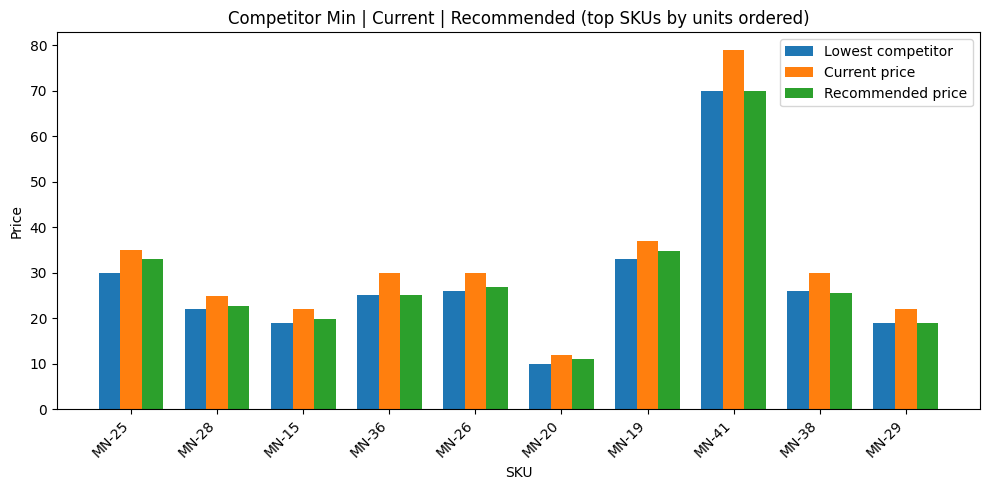

In [49]:
# Competitor Positioning 

# Cell 5: Chart - Competitor positioning for top SKUs by units_ordered
sample = df.dropna(subset=['lowest_competitor_price', 'highest_competitor_price'])
sample = sample.sort_values('units_ordered', ascending=False).head(10)

x = np.arange(len(sample))
width = 0.25

plt.figure(figsize=(10,5))
plt.bar(x - width, sample['lowest_competitor_price'].values, width)
plt.bar(x, sample['current_price'].values, width)
plt.bar(x + width, sample['recommended_price'].values, width)
plt.xticks(x, sample['sku'].values, rotation=45, ha='right')
plt.xlabel('SKU')
plt.ylabel('Price')
plt.title('Competitor Min | Current | Recommended (top SKUs by units ordered)')
plt.legend(['Lowest competitor', 'Current price', 'Recommended price'])
plt.tight_layout()
plt.savefig(r'C:\Users\HP\Downloads\KarmicSeed_Pricing_Assignment\outputs\charts\chart_competitor_positioning.png', dpi=150)
plt.show()

## Market Alignment and Competitive Discipline

#### This comparison highlights how current prices have drifted away from competitor benchmarks for several high-volume SKUs.
#### The recommended prices re-anchor these SKUs within observed market ranges, balancing competitiveness with margin protection.
#### This ensures that pricing decisions remain externally grounded while still reflecting internal cost and inventory realities.

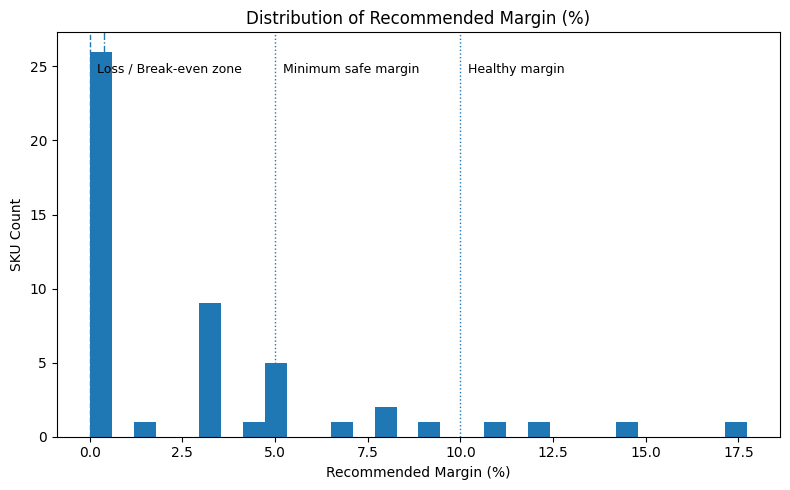

In [50]:
#  Margin Protection View 

plt.figure(figsize=(8,5))

plt.hist(df['recommended_margin_%'].dropna(), bins=30)

# Business reference lines
plt.axvline(0, linestyle='--', linewidth=1)
plt.axvline(5, linestyle=':', linewidth=1)
plt.axvline(10, linestyle=':', linewidth=1)

plt.xlabel('Recommended Margin (%)')
plt.ylabel('SKU Count')
plt.title('Distribution of Recommended Margin (%)')

plt.tight_layout()
plt.savefig(
    r'C:\Users\HP\Downloads\KarmicSeed_Pricing_Assignment\outputs\charts\chart_margin_distribution.png',
    dpi=150
)
plt.text(0.2, plt.ylim()[1]*0.9, 'Loss / Break-even zone', fontsize=9)
plt.text(5.2, plt.ylim()[1]*0.9, 'Minimum safe margin', fontsize=9)
plt.text(10.2, plt.ylim()[1]*0.9, 'Healthy margin', fontsize=9)

median_margin = df['recommended_margin_%'].median()
plt.axvline(median_margin, linestyle='-.', linewidth=1)

plt.show()


## Margin Protection Validation

#### The margin distribution confirms that recommended prices remain tightly controlled around cost.
#### Most SKUs fall within a low but positive margin band, indicating deliberate competitiveness while avoiding loss-making prices.
#### Only a small subset of SKUs achieve higher margins, reflecting selective pricing power rather than systematic overpricing.
#### This validates that margin protection is enforced as a constraint, not an optimization target.

In [51]:
# Cell 7: Insights (printable strings for markdown or slide copy-paste)
low_inv_text = f"Low inventory threshold (20th pct): {df['weeks_of_cover_t30'].quantile(0.20):.2f} weeks"
high_inv_text = f"High inventory threshold (80th pct): {df['weeks_of_cover_t30'].quantile(0.80):.2f} weeks"
insights = [
    "Key insight 1: Inventory-driven adjustments use percentile thresholds; top 20% long-cover SKUs received discounts, bottom 20% received premiums.",
    "Key insight 2: Competitor clamp ensures recommendations remain market-aligned and avoids price isolation.",
    "Key insight 3: Margin protection check is performed — recommendations do not fall below total_unit_cost.",
    low_inv_text,
    high_inv_text
]
for line in insights:
    print("-", line)


- Key insight 1: Inventory-driven adjustments use percentile thresholds; top 20% long-cover SKUs received discounts, bottom 20% received premiums.
- Key insight 2: Competitor clamp ensures recommendations remain market-aligned and avoids price isolation.
- Key insight 3: Margin protection check is performed — recommendations do not fall below total_unit_cost.
- Low inventory threshold (20th pct): 4.00 weeks
- High inventory threshold (80th pct): 8.00 weeks


In [52]:
# Cell 8: Export final deliverables
# export executive snapshot
exec_snapshot.to_csv(r'C:\Users\HP\Downloads\KarmicSeed_Pricing_Assignment\outputs\tables\executive_snapshot_recommended_prices.csv', index=False)

# export full final prices table
df.to_csv('final/final_recommended_prices_full.csv', index=False)

print("Exports:")
print(" - final/executive_snapshot_recommended_prices.csv")
print(" - final/final_recommended_prices_full.csv")
print(" - charts saved in final/ (inventory_vs_price_ratio, competitor_positioning, margin_distribution)")


Exports:
 - final/executive_snapshot_recommended_prices.csv
 - final/final_recommended_prices_full.csv
 - charts saved in final/ (inventory_vs_price_ratio, competitor_positioning, margin_distribution)
